<h1>Boston House Prediction Model</h1>
In this project we will work on developing a machine learning project using linear regression.

In [1]:
import  numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
load_boston = load_boston()
x = load_boston.data
y = load_boston.target

data = pd.DataFrame(x, columns=load_boston.feature_names)
data["SalePrice"] = y #saleprice
data.head()

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#For some reason, the loaded data does not include the target variable (MEDV), we add it here
data['MEDV'] = pd.Series(data=load_boston.target, index=data.index)
data.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


In [4]:
data.head()
print(data.shape)
# returns tuple of number of rows and columns

(506, 15)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  SalePrice  506 non-null    float64
 14  MEDV       506 non-null    float64
dtypes: float64(15)
memory usage: 59.4 KB


In [6]:
data.describe()
# gives information of data like mean of various columns, minimu maximum values, standard deciation etc.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


<h3>EDA</h3>

In [7]:
data.isnull().sum()
# dataframe.isnull() is used to check if there is any missing value in the data in pandas
# The function dataframe.isnull().values.any() returns True when there is at least one missing value 
# occurring in the data. 

# data.isnull().sum() returns the number of null values for each data feature(column)

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
SalePrice    0
MEDV         0
dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

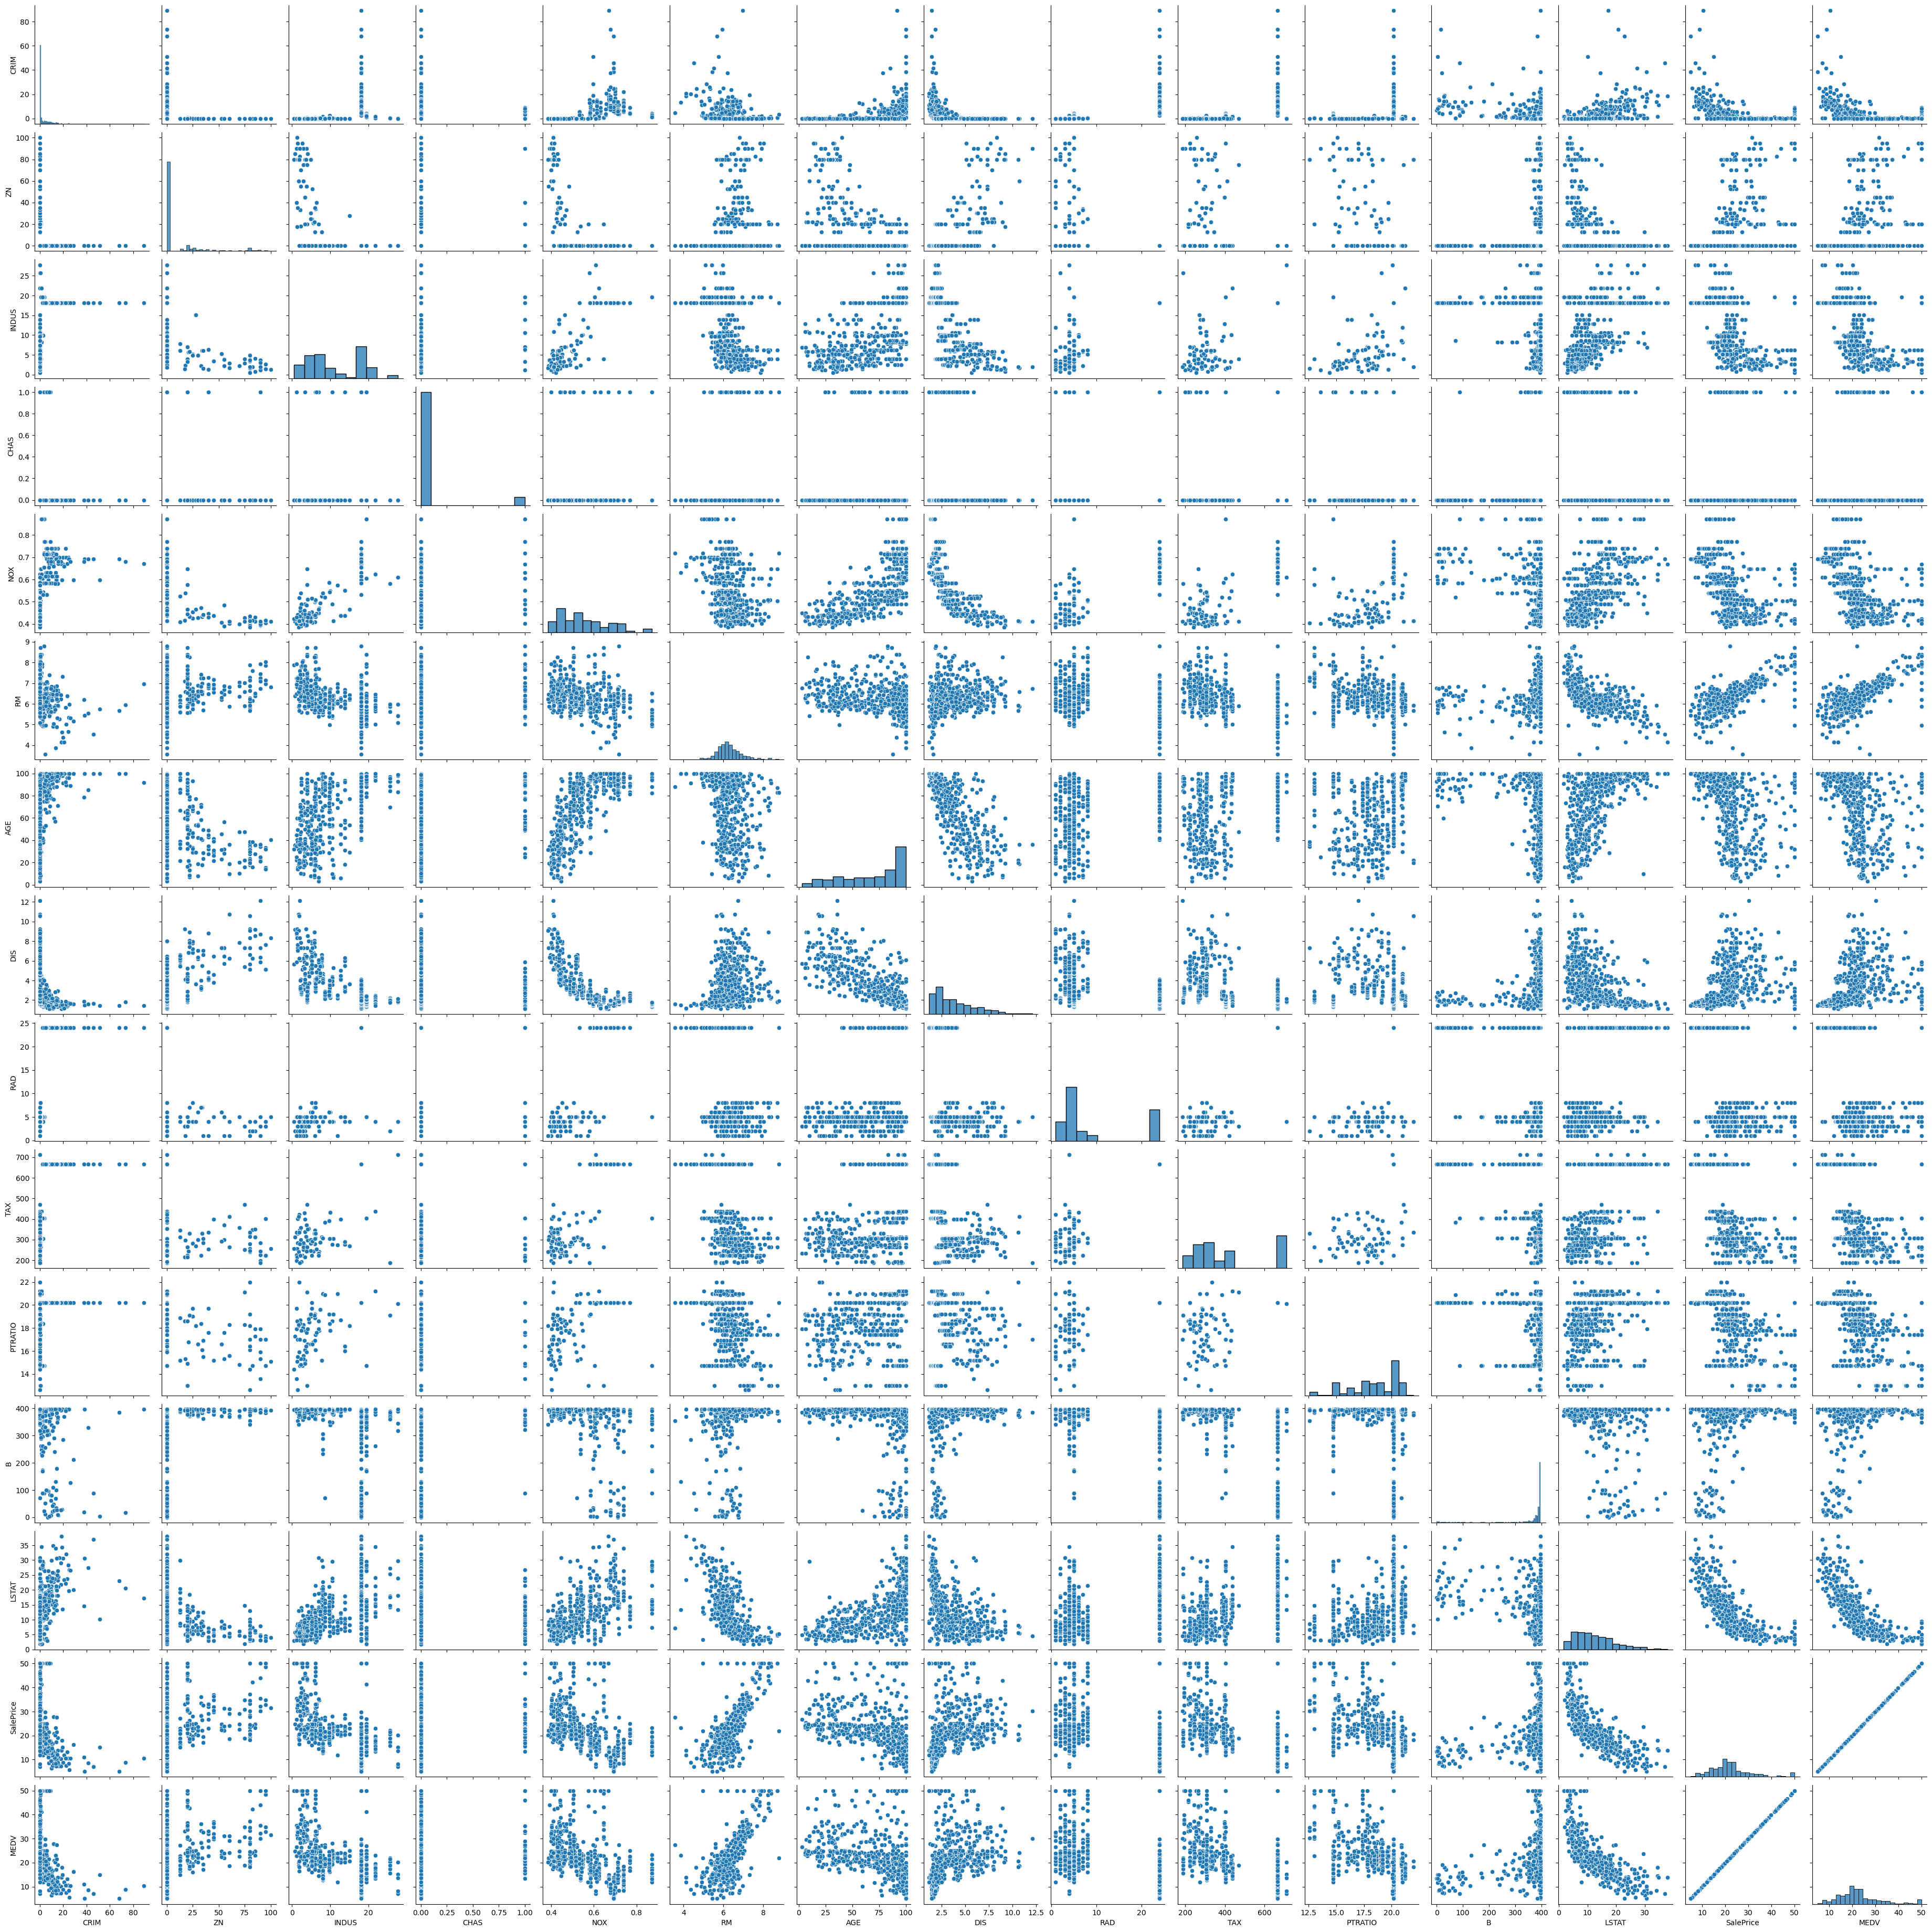

In [8]:
sns.pairplot(data, height=2.5)
plt.tight_layout

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

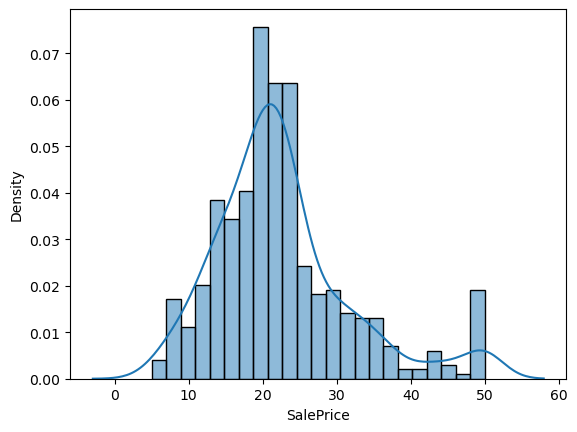

In [9]:
sns.histplot(
    data["SalePrice"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)

In [10]:
print("Skewness %f"%data["SalePrice"].skew())
print("Kurtosis %f"%data["SalePrice"].kurt())

# Skewness and Kurtosis help to find outliers in the data

Skewness 1.108098
Kurtosis 1.495197


Text(0.5, 0, 'Crime')

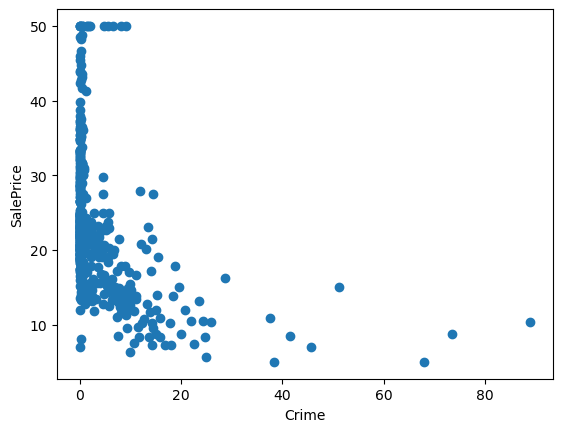

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = data["CRIM"], y=data["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("Crime")
# Used to plot graph for various features
# Where crme rate is low number of houses sold is more and prices are also high

Text(0.5, 0, 'Distance from business center')

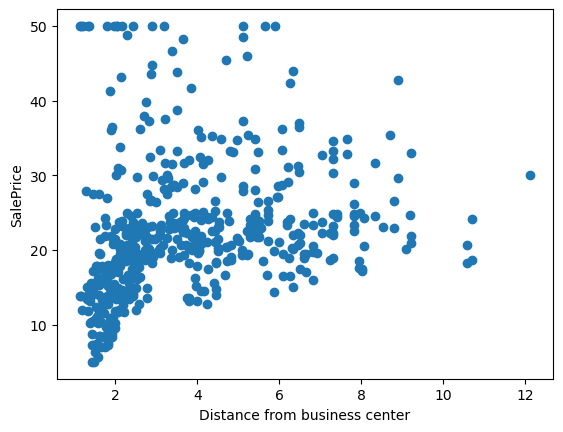

In [12]:
fig, bx = plt.subplots()
bx.scatter(x = data["DIS"], y = data["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("Distance from business center")

Text(0.5, 0, 'Avg No of rooms')

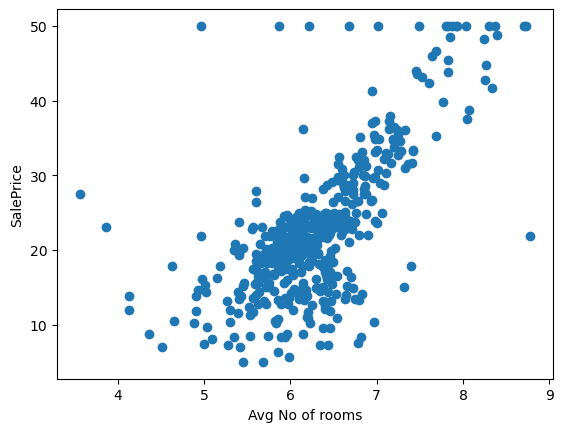

In [13]:
fig, bx = plt.subplots()
bx.scatter(x = data["RM"], y = data["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("Avg No of rooms")

# Here we can observe as number of rooms increases the price increases

Text(0.5, 0, 'Nitric Oxide Concentration')

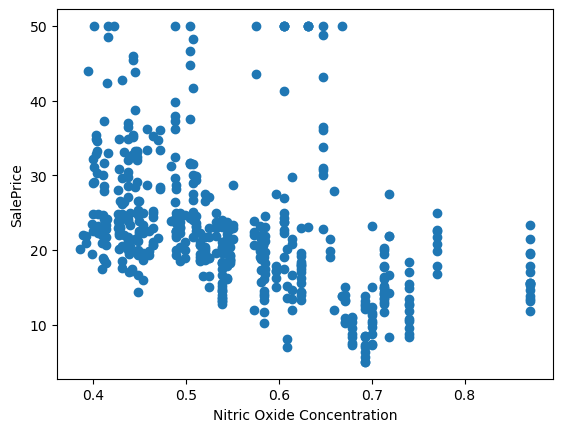

In [14]:
fig, bx = plt.subplots()
bx.scatter(x = data["NOX"], y = data["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("Nitric Oxide Concentration")

Text(0.5, 0, 'Property Tax')

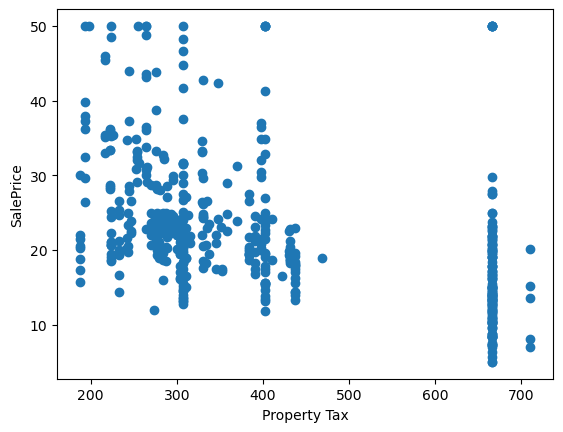

In [15]:
fig, bx = plt.subplots()
bx.scatter(x = data["TAX"], y = data["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("Property Tax")

Text(0.5, 0, 'Age of house')

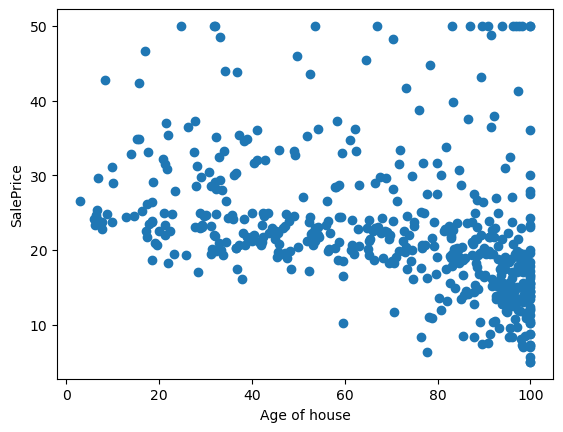

In [16]:
fig, bx = plt.subplots()
bx.scatter(x = data["AGE"], y = data["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("Age of house")

Text(0.5, 0, 'Distance from highways')

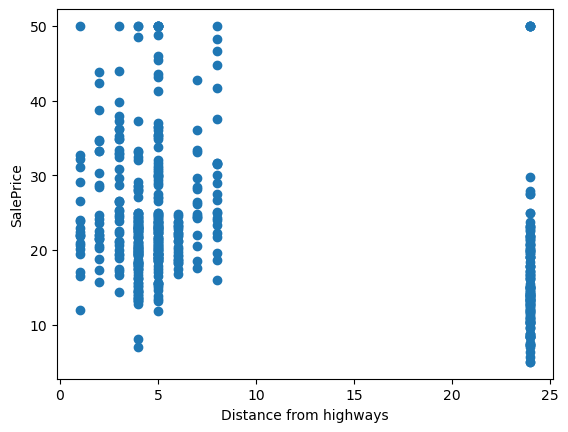

In [17]:
fig, bx = plt.subplots()
bx.scatter(x = data["RAD"], y = data["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("Distance from highways")

Text(0.5, 0, 'Proportion of Black People')

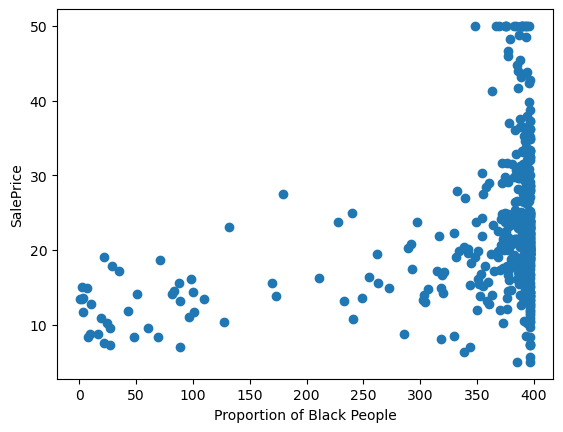

In [18]:
fig, bx = plt.subplots()
bx.scatter(x = data["B"], y = data["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("Proportion of Black People")

mu =  22.532806324110677 sigma =  9.188011545278203


C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


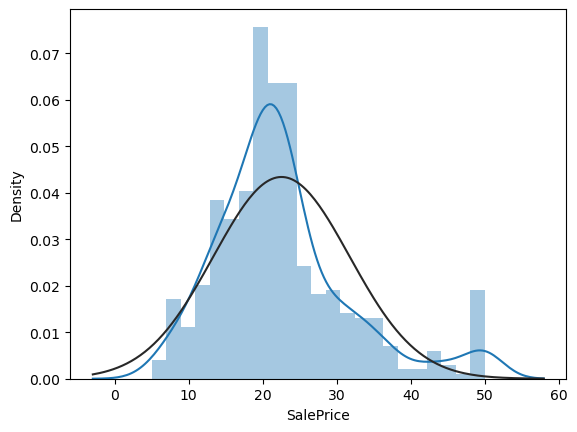

In [19]:
# To plot the normal distribution plot

from scipy import stats
from scipy.stats import norm, skew

sns.distplot(data["SalePrice"], fit = norm)
(mu, sigma) = norm.fit(data["SalePrice"])
print("mu = ", mu, "sigma = ",sigma)


# Data Correlation

In [20]:
# plt.figure(figsize=(10,10))
# corr = data.corr()
# corr_target = abs(corr["SalePrice"])  #absolute value of correlation of features
# relevant_features = corr_target[corr_target>0.2]
# names = [index for index, value in relevant_features.iteritems()]
# names.remove("SalePrice")  #removing target features
# print(names)
# print(len(names))

In [21]:
X = data.drop("SalePrice", axis = 1)
Y = data["SalePrice"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 14)
(167, 14)
(339,)
(167,)


In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 14)
(167, 14)
(339,)
(167,)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# ls = Lasso() 
# ls.fit(X_train,Y_train)
lr = LinearRegression()
rr = Ridge()
rr.fit(X_train,Y_train)
lr.fit(X_train,Y_train)

LinearRegression()

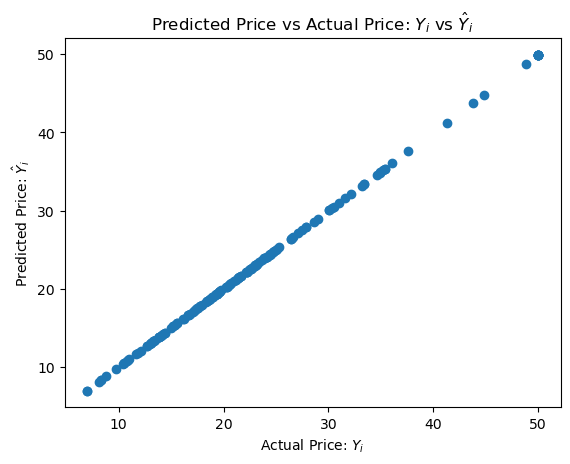

In [24]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1) #a higher value of alpha restricts the coefficients further
ls.fit(X_train,Y_train)
Y_pred_train = ls.predict(X_train) #predictions on training data
Y_pred = ls.predict(X_test) #predictions on testing data
# We plot predicted Y (y-axis) against actual Y (x-axis). Perfect predictions will lie on the diagonal. We see the diagonal trend, suggesting a 'good' fit
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted Price: $\hat{Y}_i$")
plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [25]:
#Get mean squared error and R-square for both training & testing data
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error: on training data: ',mean_squared_error(Y_train,Y_pred_train), '| And on Testing data',mean_squared_error(Y_test,Y_pred))
print('R-Squared Error: on training data: ',r2_score(Y_train,Y_pred_train), '| And on Testing data',r2_score(Y_test,Y_pred))

Mean Squared Error: on training data:  0.00015893290267026853 | And on Testing data 0.0002062945896574145
R-Squared Error: on training data:  0.999998009011082 | And on Testing data 0.9999977993801908


In [26]:
predict_linear = lr.predict(X_test)
predict_ridge = rr.predict(X_test)
predict_lasso = ls.predict(X_test)
print("The actual price of the house is: ",Y_test[0])
print("The predicted price of the house is: ",predict_linear[0])
print("The predicted price of the house is: ",predict_ridge[0])
print("The predicted price of the house is: ",predict_lasso[0])

The actual price of the house is:  24.0
The predicted price of the house is:  37.6
The predicted price of the house is:  37.59994748220123
The predicted price of the house is:  37.57928444351015


<h1>Calaculating the errors in predictions</h1>

In [27]:
from sklearn.metrics import mean_squared_error

mean_squared_error_linear = mean_squared_error(predict_linear,Y_test)
root_mean_sq_error_linear = np.sqrt(mean_squared_error_linear)

mean_squared_error_ridge = mean_squared_error(predict_ridge,Y_test)
root_mean_sq_error_ridge = np.sqrt(mean_squared_error_ridge)

mean_squared_error_lasso = mean_squared_error(Y_test,predict_lasso)
root_mean_sq_error_lasso = np.sqrt(mean_squared_error_lasso)
print(mean_squared_error_linear)
print(mean_squared_error_ridge)
print(mean_squared_error_lasso)

1.8889864840266544e-27
6.469186547983439e-07
0.0002062945896574145


As we can observe for the above data the Ridge Regression model is calculating the price of the house more acurately than the linear regression model though the difference is quiet small

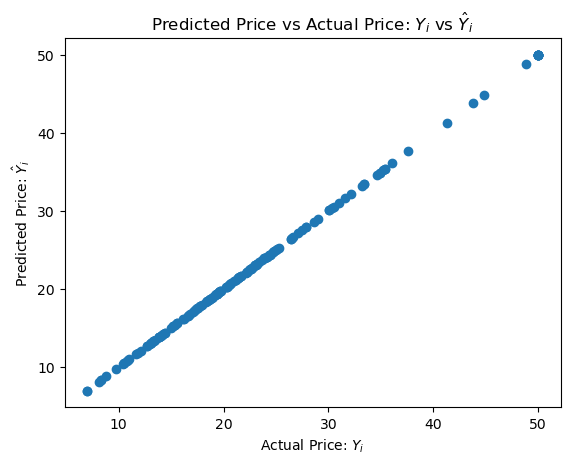

In [28]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predict_linear)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted Price: $\hat{Y}_i$")
plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
plt.show()

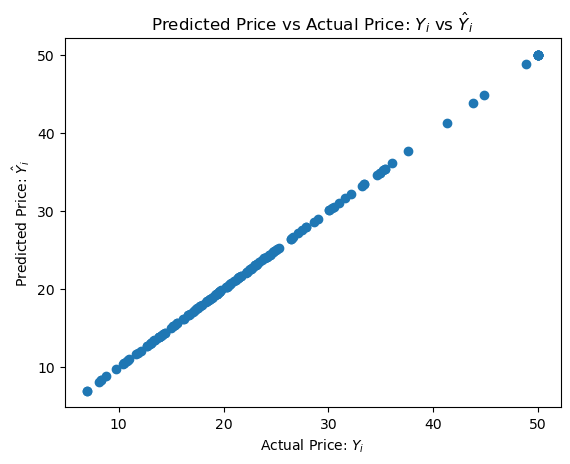

In [29]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predict_ridge)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted Price: $\hat{Y}_i$")
plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
plt.show()

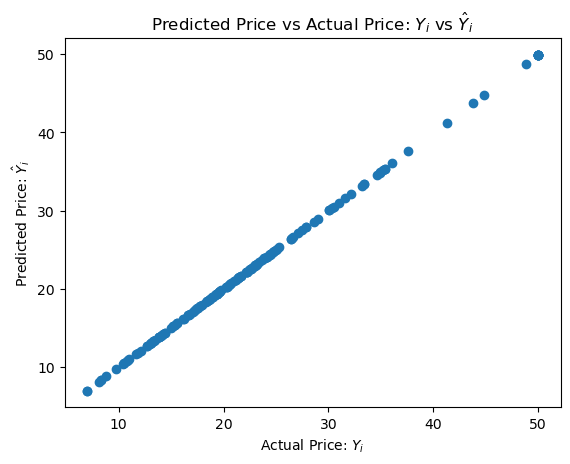

In [30]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predict_lasso)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted Price: $\hat{Y}_i$")
plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
plt.show()